In [1]:
import numpy as np
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Lucida Bright']

In [4]:
# Generate data
n = 10000
d = 10
x = np.random.randn(n, d)


In [5]:
K_g = RBF(length_scale=d)
K_lap = Matern(length_scale=d, nu=0.5)
K_mat = Matern(length_scale=d, nu=5/2)

In [6]:
Kg = K_g.__call__(x,x)
Kl = K_lap.__call__(x,x)
Km = K_mat.__call__(x,x)

In [7]:
Lg = np.abs(np.linalg.eigvalsh(Kg))
Lm = np.abs(np.linalg.eigvalsh(Km))
L1 = np.abs(np.linalg.eigvalsh(Kl))


In [8]:
L1 = L1[::-1]
Lg = Lg[::-1]
Lm = Lm[::-1]

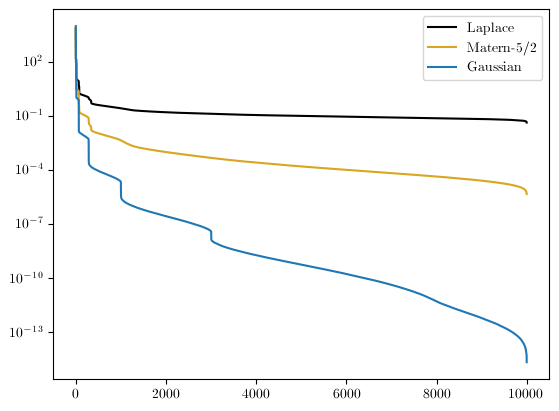

In [9]:
plt.semilogy(L1,label='Laplace', color='black')
plt.semilogy(Lm,label ='Matern-5/2', color='goldenrod')
plt.semilogy(Lg, label='Gaussian')
plt.legend()

In [10]:
mu = 0.01

In [11]:
dg = np.int64(np.sum(Lg/(Lg+mu)))
print(dg)
dm = np.int64(np.sum(Lm/(Lm+mu)))
print(dm)
dl = np.int64(np.sum(L1/(L1+mu)))
print(dl)

169
899
9101


In [101]:
Dg = []
Dm = []
Dl = []

Sg = []
Sm = []
Sl = []

Rg = []
Rm = []
Rl = []
gammas = [1, 2, 4, 8, 16, 32, 64, 128, 256]

In [102]:
def gamma_lmin_eff_dim(L, gamma, mu):
    rho = gamma*(mu+L[-1])
    return np.sum(L/(L+rho))

In [103]:
def gamma_flat_dim(L, gamma, mu):
    return np.sum(L>=gamma*(mu+L[-1])) 

In [104]:
for gamma in gammas:
    dl = gamma_flat_dim(L1, gamma, mu)
    sl = gamma_lmin_eff_dim(L1, gamma, mu)
    rl = gamma_lmin_eff_dim(L1, gamma, mu)/gamma_flat_dim(L1, gamma, mu)

    dm = gamma_flat_dim(Lm, gamma, mu)
    sm = gamma_lmin_eff_dim(Lm, gamma, mu)
    rm = gamma_lmin_eff_dim(Lm, gamma, mu)/gamma_flat_dim(Lm, gamma, mu)

    dg = gamma_flat_dim(Lg, gamma, mu)
    sg = gamma_lmin_eff_dim(Lg, gamma, mu)
    rg = gamma_lmin_eff_dim(Lg, gamma, mu)/gamma_flat_dim(Lg, gamma, mu)

    Dl.append(dl)
    Dm.append(dm)
    Dg.append(rm)

    Sl.append(sl)
    Sm.append(sm)
    Sg.append(Sg)   

    Rl.append(rl)
    Rm.append(rm)
    Rg.append(rg)
    

In [1]:
plt.semilogx(gammas, Dl, label=r"Laplace $(\gamma$-flat dimension)", color='black', base=2)
plt.semilogx(gammas, Sl, label ='Laplace', color='black', linestyle='dashed', base=2)
plt.semilogx(gammas, Dm, label=r"Matern 5/2 $(\gamma$-flat dimension)", color='goldenrod', base=2)
plt.semilogx(gammas, Sm, label ='Matern 5/2', color='goldenrod', linestyle='dashed', base=2)
plt.xlabel(r"$\gamma$", fontsize=16)
plt.ylabel(r"Rank", fontsize=22, labelpad=40, rotation=0)
plt.xlim(2**0,2**8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.tight_layout()

NameError: name 'plt' is not defined

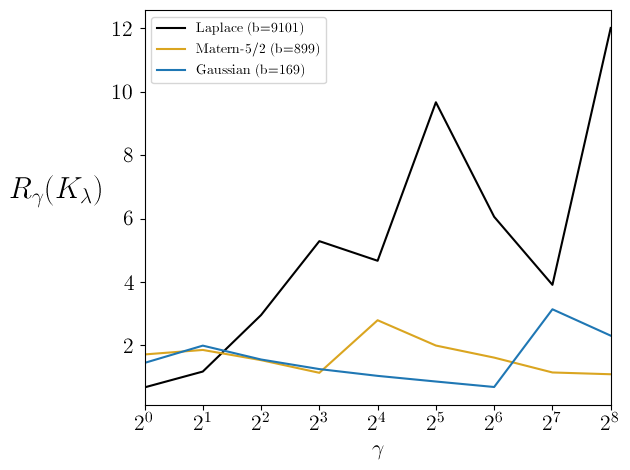

In [96]:
plt.semilogx(gammas, Rl, label='Laplace (b=9101)', color='black', base=2)
plt.semilogx(gammas, Rm, label ='Matern-5/2 (b=899)', color='goldenrod', base=2)
plt.semilogx(gammas, Rg, label='Gaussian (b=169)', base=2)
plt.xlabel(r"$\gamma$", fontsize=16)
plt.ylabel(r"$R_{\gamma}(K_\lambda)$", fontsize=22, labelpad=40, rotation=0)
plt.xlim(2**0,2**8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('blambda_eff_dim.pdf')

In [ ]:
# plt.semilogx(gammas, Dl, base=2)
# plt.semilogx(gammas, Dm1, base=2)
# plt.semilogx(gammas, Dm2, base=2)
# plt.xlabel(r"$\gamma$", fontsize=16)
# plt.ylabel(r"$d^{(b,\gamma \lambda)}_{\textup{eff}}(K)$", fontsize=16)
# plt.xlim(2**0,2**9)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

In [2]:
mu = np.ones(100)

In [3]:
mu[0] = 10

In [ ]:
np.sum(mu/(mu+2))